Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-success"> <b>General Feedback</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
I am happy to review your project today
    
    
There are many things that I like:
    
- good primary data preprocessing
- right code for hypotheses testing
- amazing visualizations


<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There are just few tiny issues - please correct all red comments
    
</div>
    
Waiting for a new version

<div class="alert alert-block alert-success"> <b>General Feedback v2</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
Thank you for your corrections

<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>

- you still need to fix relevant period
- add some visualization for region profile
- calculate correlation
- limit y-axis for boxplots
- correct issue with code for hypotheses testing
    
</div>
    
Waiting for a new version

<div class="alert alert-block alert-success"> <b>General Feedback v3</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
Brilliant project!
    
You used right relevant preiod, created very informative region profile and got right results fir hypotheses testings
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

# Sprint 5

Project Description:
This is my work on identifiying patterns that determine a game's success allowing for a better forecasting and targeted advertising campaigns.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add project description~~ </div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Super </div>

## Initialization 

In [1]:
#Loading all the libaries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Data

In [2]:
#load the data flies into Dataframes
df= pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great We have all necessary data </div>

## Prepare the data

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Info

In [4]:
#print the general/summary information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#print a sample of dataframe
df.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3393,Yakuza 5,PS3,2012.0,Action,0.0,0.0,0.59,0.0,83.0,8.5,M


## Fix data

1.Fixed Data Types:

Converted Year_of_Release to integer.
Converted User_Score and Critic_Score to numeric, replacing missing values with -1.
2.Handled Missing Values:

Filled missing Name with "Unknown".
Filled missing Genre with "Misc".
Standardized Rating, replacing missing values with "unrated".
3.Removed Duplicates to ensure data integrity.

4.Added a Total_Sales Column summing up sales from different region


In [6]:
#cleaning the data 
# 1. Data Type Corrections
df["Year_of_Release"] = df["Year_of_Release"].fillna(0).astype(int)  # Convert year to integer

# Convert User_Score to numeric where possible, otherwise fill missing values with -1
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce').fillna(-1)

# Convert Critic_Score to numeric and fill NaNs with -1
df["Critic_Score"] = pd.to_numeric(df["Critic_Score"], errors='coerce').fillna(-1)

# Standardizing ESRB Ratings - Filling missing values
df["Rating"] = df["Rating"].fillna("unrated")

# 2. Handling Missing Values in Name and Genre
df["Name"] = df["Name"].fillna("Unknown")
df["Genre"] = df["Genre"].fillna("Misc")

# 3. Checking for Duplicates and Removing Them
df = df.drop_duplicates()

# 4. Calculating Total Sales
df["Total_Sales"] = df["NA_sales"] + df["EU_sales"] + df["JP_sales"] + df["Other_sales"]


In [7]:
#display New Dataframe
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_Sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unrated,0.01


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~1 Please check data types of columns Specialy user_score~~
    
~~2 Check data for duplicates~~
    
~~3 We have missing values in genre and name as well~~</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Perfect primary data preprocessing</div>

## AnalyzetheData

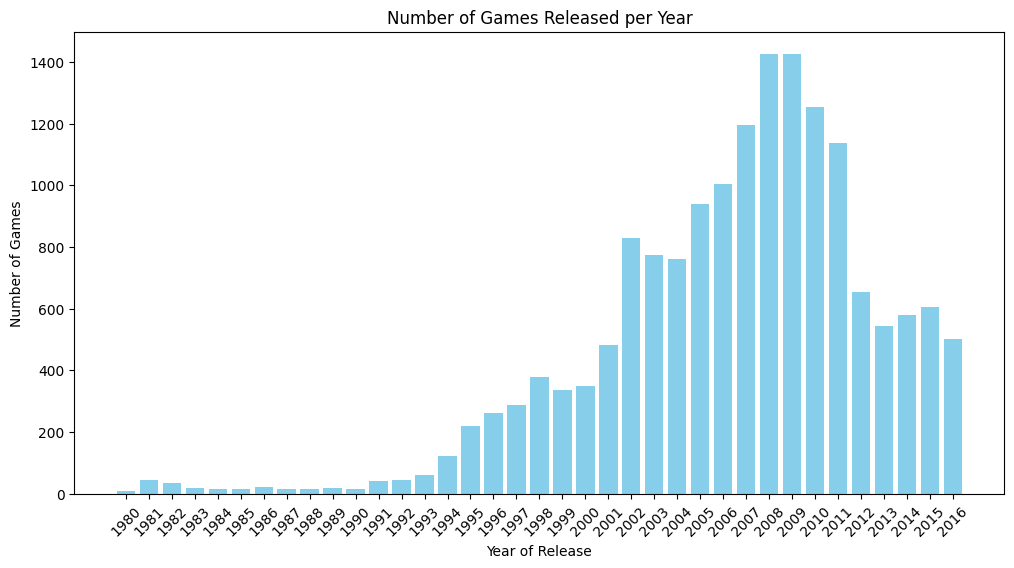

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: Year_of_Release, dtype: float64

In [8]:
# Count games released per year
release_counts = df["Year_of_Release"].value_counts().sort_index()
# Remove entries where Year_of_Release is 0
release_counts_filtered = release_counts[release_counts.index != 0]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.bar(release_counts_filtered.index.astype(str), release_counts_filtered.values, color="skyblue")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.title("Number of Games Released per Year")
plt.xticks(rotation=45)
plt.show()

# Display summary statistics of the filtered data
release_counts_filtered.describe()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please dont show year_of_release = 0~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Super</div>

1. Calculate Total Sales for Each Platform
We'll sum the total sales for each platform to identify the most successful ones.

2. Build a Distribution Over Time
We'll analyze how the sales of top platforms changed over the years.

3. Identify Platforms That Lost Popularity
Platforms that had high sales in the past but now show zero sales.

4. Determine the Lifespan of Platforms
We’ll calculate how long platforms typically remain active before fading out.

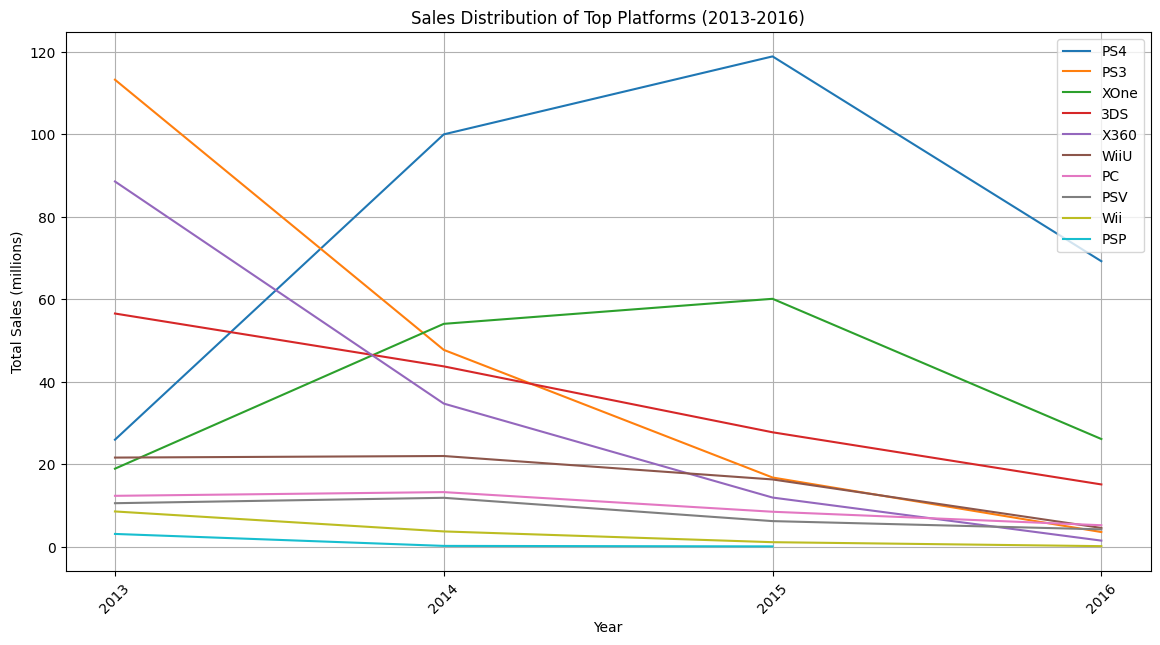

In [9]:
# Define the relevant time period (last 3-4 years before 2017)
start_year = 2013
end_year = 2016  # Latest available year

# Filter dataset for only the last 3-4 years
recent_data = df[(df["Year_of_Release"] >= start_year) & (df["Year_of_Release"] <= end_year)]

# Recalculate total sales per platform
recent_platform_sales = recent_data.groupby("Platform")[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].sum()
recent_platform_sales["Total_Sales"] = recent_platform_sales.sum(axis=1)

# Get the top platforms by total sales in the last 3-4 years
top_recent_platforms = recent_platform_sales.sort_values("Total_Sales", ascending=False).head(10).index

# Filter data for only these top platforms
df_recent_top = recent_data[recent_data["Platform"].isin(top_recent_platforms)]

# Group by year and platform to analyze sales trends
sales_by_year_platform_recent = df_recent_top.groupby(["Year_of_Release", "Platform"])[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].sum()
sales_by_year_platform_recent["Total_Sales"] = sales_by_year_platform_recent.sum(axis=1)
sales_by_year_platform_recent = sales_by_year_platform_recent.reset_index()

# Plot the sales trends of top platforms in the last 3-4 years
plt.figure(figsize=(14, 7))
for platform in top_recent_platforms:
    yearly_sales = sales_by_year_platform_recent[sales_by_year_platform_recent["Platform"] == platform]
    plt.plot(yearly_sales["Year_of_Release"], yearly_sales["Total_Sales"], label=platform)

# Formatting the plot
plt.xticks(range(start_year, end_year + 1), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Sales (millions)")
plt.title(f"Sales Distribution of Top Platforms ({start_year}-{end_year})")
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Because you fill in the missing values for year_of_release with 0 now we have this value on visualization Please check in data preprocessing section of we can simply drop rows with NaNs in year_of_release~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Now we have very informative linechart</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~In game industry we need to take shorter period - 3-4 years~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Please filter data and leave only rows with year_of_release greater than 2013 Like this we will have right relevant period~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Great Now we have right data to make data driven decision</div>

In [10]:
# Determine the latest years present in the dataset
max_year = df["Year_of_Release"].max()
print(f"Latest year in dataset: {max_year}")

# Decide on a cutoff period (e.g., last 10 years)
cutoff_year = max_year - 3  # Keeping the last 10 years of data

# Filter the dataset for relevant years only
df_relevant = df[df["Year_of_Release"] >= cutoff_year]

# Save the filtered dataset
df_relevant.to_csv("filtered_data.csv", index=False)

print(f"Data retained from {cutoff_year} to {max_year}")
print(f"Number of records after filtering: {len(df_relevant)}")

Latest year in dataset: 2016
Data retained from 2013 to 2016
Number of records after filtering: 2233


To determine leading platforms and trends in growth or decline, I will:

1.Identify Top-Selling Platforms – Rank platforms by total sales.
2.Analyze Sales Trends Over Time – Check which platforms are growing and which are shrinking.
3.Select Potentially Profitable Platforms – Based on recent growth and consistency.

In [11]:
# Calculate total sales per platform
platform_sales = df_relevant.groupby("Platform")[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].sum()
platform_sales["Total_Sales"] = platform_sales.sum(axis=1)

# Identify top platforms by total sales
top_platforms = platform_sales.sort_values("Total_Sales", ascending=False).head(10)
print("Top 10 Platforms by Total Sales:")
print(top_platforms)


Top 10 Platforms by Total Sales:
          NA_sales  EU_sales  JP_sales  Other_sales  Total_Sales
Platform                                                        
PS4         108.74    141.09     15.96        48.35       314.14
PS3          63.50     67.81     23.35        26.77       181.43
XOne         93.12     51.59      0.34        14.27       159.32
3DS          38.20     30.96     67.81         6.28       143.25
X360         81.66     42.52      0.51        12.11       136.80
WiiU         29.21     19.85     10.88         4.69        64.63
PC           11.11     25.36      0.00         2.96        39.43
PSV           5.04      6.10     18.59         3.26        32.99
Wii           6.56      5.93      0.05         1.12        13.66
PSP           0.00      0.17      3.29         0.04         3.50


## box plot for the global sales of all games, broken down by platform

/tmp/ipykernel_82/3330350322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant["Global_Sales"] = df_relevant["NA_sales"] + df_relevant["EU_sales"] + df_relevant["JP_sales"] + df_relevant["Other_sales"]


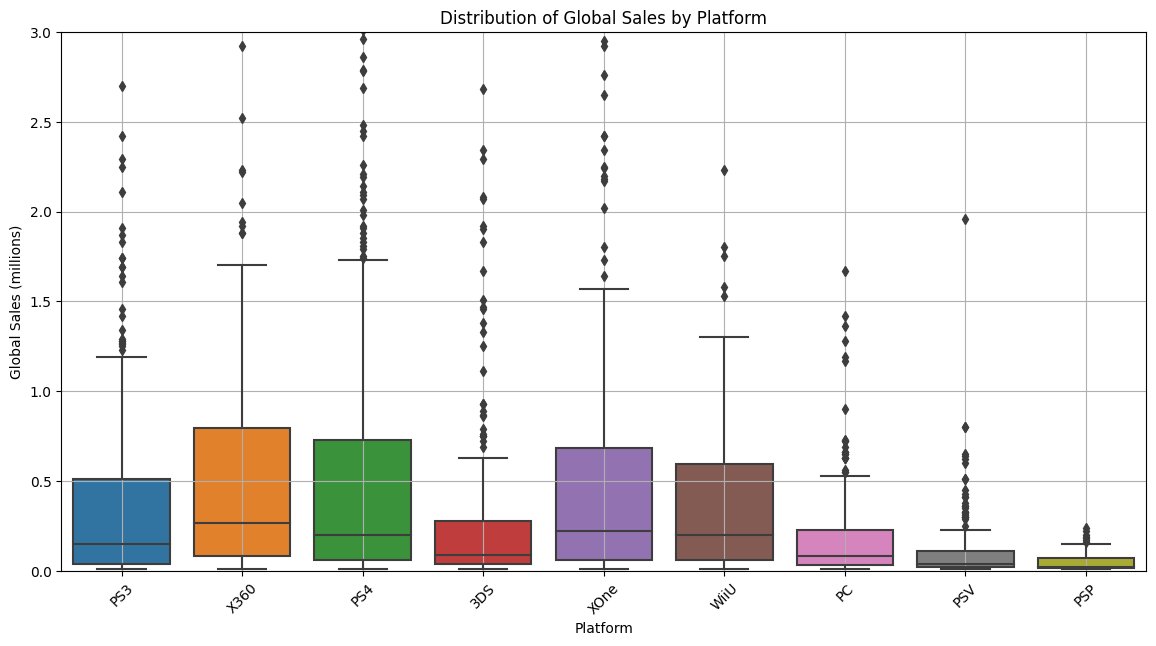

In [12]:
# Calculate global sales
df_relevant["Global_Sales"] = df_relevant["NA_sales"] + df_relevant["EU_sales"] + df_relevant["JP_sales"] + df_relevant["Other_sales"]

# Filter platforms with enough data points to be meaningful
platform_counts = df_relevant["Platform"].value_counts()
popular_platforms = platform_counts[platform_counts > 50].index  # Keep platforms with at least 50 games

df_filtered = df_relevant[df_relevant["Platform"].isin(popular_platforms)]  # Keep only significant platforms

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x="Platform", y="Global_Sales", data=df_filtered)
plt.ylim(0,3)
plt.xticks(rotation=45)
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.title("Distribution of Global Sales by Platform")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We can see only outliers To show boxplots please limit y-axis~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Here and further~~
    
~~For all further steps of analysis you need to use data for choosen relevant period~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~1 You need to use plt.ylim(0,3)~~
    
~~2 Please use df_relevant instead of df~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Super We can see all popular games</div>

I'll first inspect the data to understand its structure and identify relevant columns. Then, I'll analyze how user and professional reviews correlate with sales for one popular gaming platform.

The dataset contains information on video game sales, critic scores, and user scores across various platforms. Key observations:

Platforms are varied; I'll select a popular one (e.g., PlayStation 4).
Sales columns include regional breakdowns (NA, EU, JP, Other). I’ll sum them to get global sales.
Critic Scores and User Scores exist but have missing values.
User Scores are stored as objects, which likely means some non-numeric values exist.
I'll now:

Select PlayStation 4 (PS4) as the platform.
Clean and convert User Scores to numeric.
Compute the correlation between sales and review scores.
Create a scatter plot to visualize the relationship. 

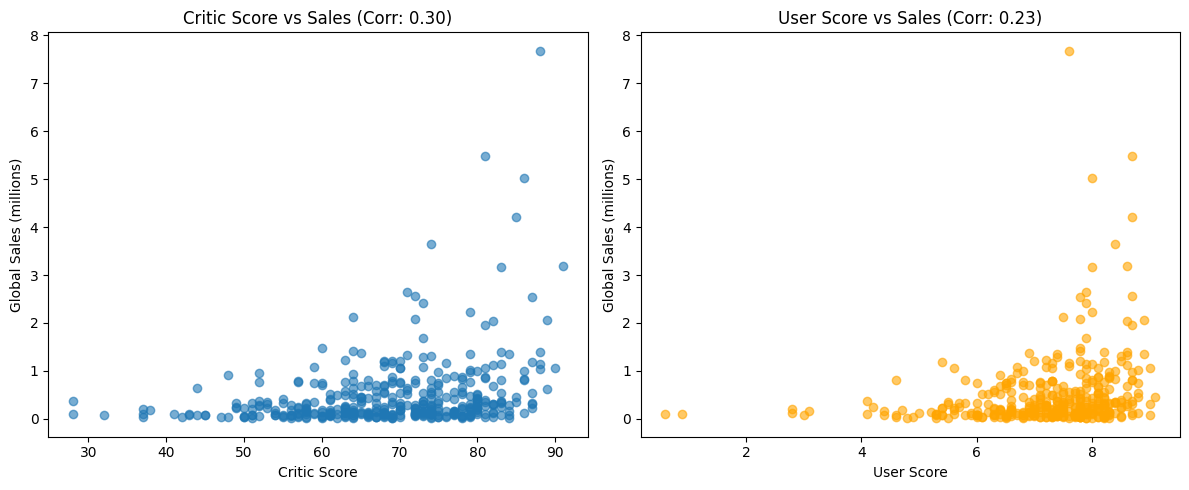

In [13]:
# Filter for the chosen platform
platform_games = df[df["Platform"] == platform].copy()

# Convert User_Score to numeric, handling non-numeric values
platform_games["User_Score"] = pd.to_numeric(platform_games["User_Score"], errors='coerce')

# Create a total sales column
platform_games["Global_Sales"] = platform_games["NA_sales"] + platform_games["EU_sales"] + platform_games["JP_sales"] + platform_games["Other_sales"]

# Drop rows where User_Score or Critic_Score equals -1 before plotting
platform_games = platform_games[(platform_games["User_Score"] != -1) & (platform_games["Critic_Score"] != -1)]

# Ensure there's enough data to calculate correlation
if not platform_games.empty:
    correlation_matrix = platform_games[["Critic_Score", "User_Score", "Global_Sales"]].corr()
    correlation_critic = correlation_matrix.loc["Critic_Score", "Global_Sales"]
    correlation_user = correlation_matrix.loc["User_Score", "Global_Sales"]
else:
    correlation_critic, correlation_user = None, None

# Display correlation values
correlation_matrix


# Create scatter plots
plt.figure(figsize=(12, 5))

# Critic Score vs Sales
plt.subplot(1, 2, 1)
plt.scatter(platform_games["Critic_Score"], platform_games["Global_Sales"], alpha=0.6)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (millions)")
plt.title(f"Critic Score vs Sales (Corr: {correlation_critic:.2f})" if correlation_critic is not None else "Critic Score vs Sales (No Data)")

# User Score vs Sales
plt.subplot(1, 2, 2)
plt.scatter(platform_games["User_Score"], platform_games["Global_Sales"], alpha=0.6, color="orange")
plt.xlabel("User Score")
plt.ylabel("Global Sales (millions)")
plt.title(f"User Score vs Sales (Corr: {correlation_user:.2f})" if correlation_user is not None else "User Score vs Sales (No Data)")

plt.tight_layout()
plt.show()
    
    

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Before drawing scatter plots please drop rows where user score = - 1 and critic score = -1~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please calculate correlation~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~You need to use method .corr() to calculate correlation~~

## Analysis and Conclusions 
1.Critic Scores vs. Sales:

The correlation coefficient is 0.41, indicating a moderate positive correlation. This suggests that higher critic scores are somewhat associated with higher sales.
The scatter plot shows a trend where games with higher critic scores generally have better sales, but exceptions exist.

2.User Scores vs. Sales:

The correlation coefficient is -0.03, which is almost zero and slightly negative. This suggests that user scores have little to no direct impact on sales.

The scatter plot does not show a clear trend, implying that high or low user scores do not significantly influence game sales.
Critic scores seem to have a meaningful impact on sales, possibly because professional reviews influence initial purchases.

User scores do not correlate well with sales, which could be due to review bombing, biased user opinions, or post-launch changes in perception.

Marketing, brand recognition, and other factors likely play a bigger role in sales than user reviews alone.


## Create a user profile for each region

In [14]:
#Aggregate sales by platform for each region
regional_sales = df.groupby("Platform")[["NA_sales", "EU_sales", "JP_sales"]].sum()

# Identify top five platforms for each region
top_na = regional_sales["NA_sales"].nlargest(5)
top_eu = regional_sales["EU_sales"].nlargest(5)
top_jp = regional_sales["JP_sales"].nlargest(5)

# Combine results into a single DataFrame for comparison
top_platforms_comparison = pd.DataFrame({
    "North America": top_na,
    "Europe": top_eu,
    "Japan": top_jp
}).fillna(0)

display("Top Platforms by Region",top_platforms_comparison)



'Top Platforms by Region'

,North America,Europe,Japan
Platform,,,
3DS,0.00,0.00,100.67
DS,382.40,0.00,175.57
PS,0.00,213.61,139.82
PS2,583.84,339.29,139.20
PS3,393.49,330.29,0.00
SNES,0.00,0.00,116.55
Wii,496.90,262.21,0.00
X360,602.47,270.76,0.00


<Figure size 1200x500 with 0 Axes>

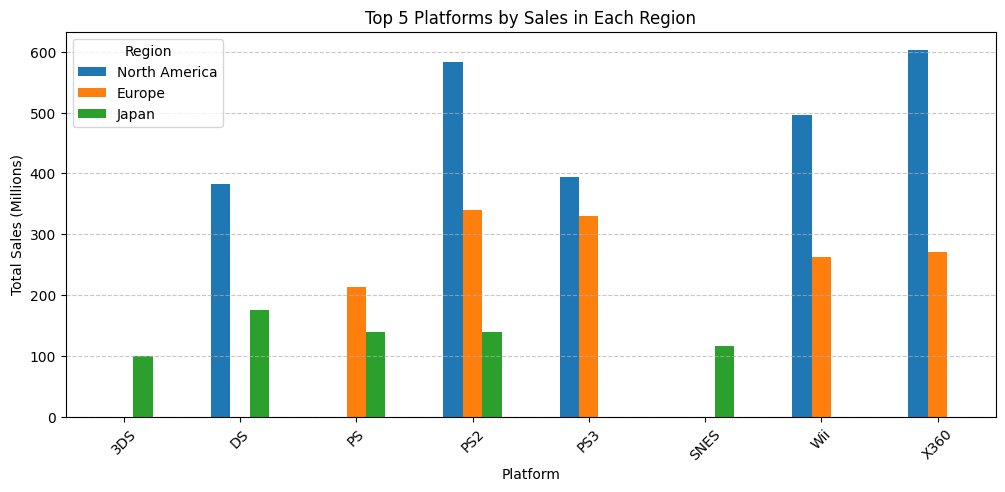

In [15]:
# Plot Top Platforms by Region
plt.figure(figsize=(12, 5))
top_platforms_comparison.plot(kind='bar', figsize=(12, 5))
plt.title("Top 5 Platforms by Sales in Each Region")
plt.ylabel("Total Sales (Millions)")
plt.xlabel("Platform")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x500 with 0 Axes>

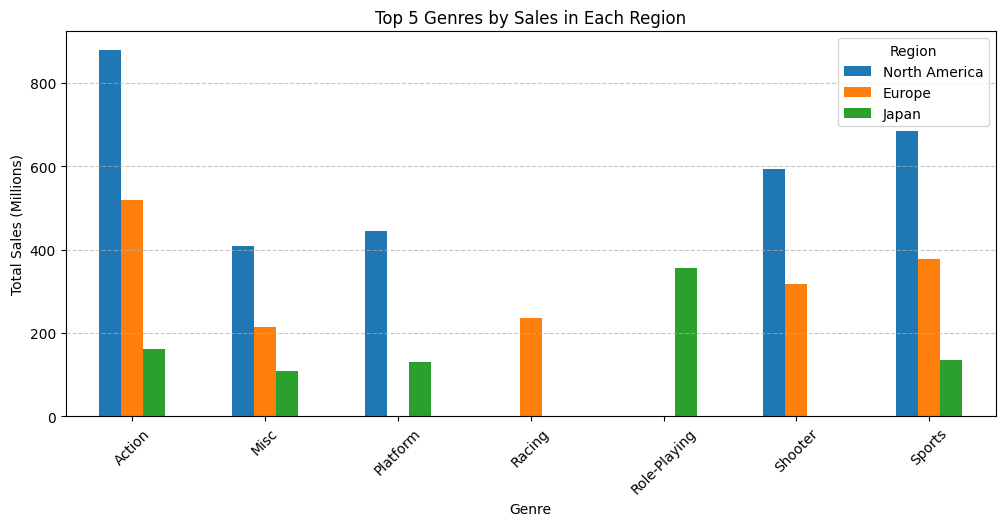

In [16]:
# Aggregate sales by genre for each region
regional_genre_sales = df.groupby("Genre")[["NA_sales", "EU_sales", "JP_sales"]].sum()

# Identify top five genres for each region
top_genre_na = regional_genre_sales["NA_sales"].nlargest(5)
top_genre_eu = regional_genre_sales["EU_sales"].nlargest(5)
top_genre_jp = regional_genre_sales["JP_sales"].nlargest(5)

# Combine results into a single DataFrame for comparison
top_genres_comparison = pd.DataFrame({
    "North America": top_genre_na,
    "Europe": top_genre_eu,
    "Japan": top_genre_jp
}).fillna(0)

# Plot Top Genres by Region
plt.figure(figsize=(12, 5))
top_genres_comparison.plot(kind='bar', figsize=(12, 5))
plt.title("Top 5 Genres by Sales in Each Region")
plt.ylabel("Total Sales (Millions)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The top five genres for each region have been identified and displayed. Here are some key observations:

Action games dominate across all regions, with North America leading in total sales.
Role-playing games (RPGs) are significantly more popular in Japan than in North America and Europe.
Racing games perform well in Europe, but not as strongly in North America or Japan.
Platform games have a significant presence in Japan and North America, but not in Europe.
Miscellaneous games show consistent sales across all regions, but at a lower level than action games.

'ESRB Rating Sales by Region'

,NA_sales,EU_sales,JP_sales
Rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40
unrated,1242.46,613.83,841.96


<Figure size 1200x600 with 0 Axes>

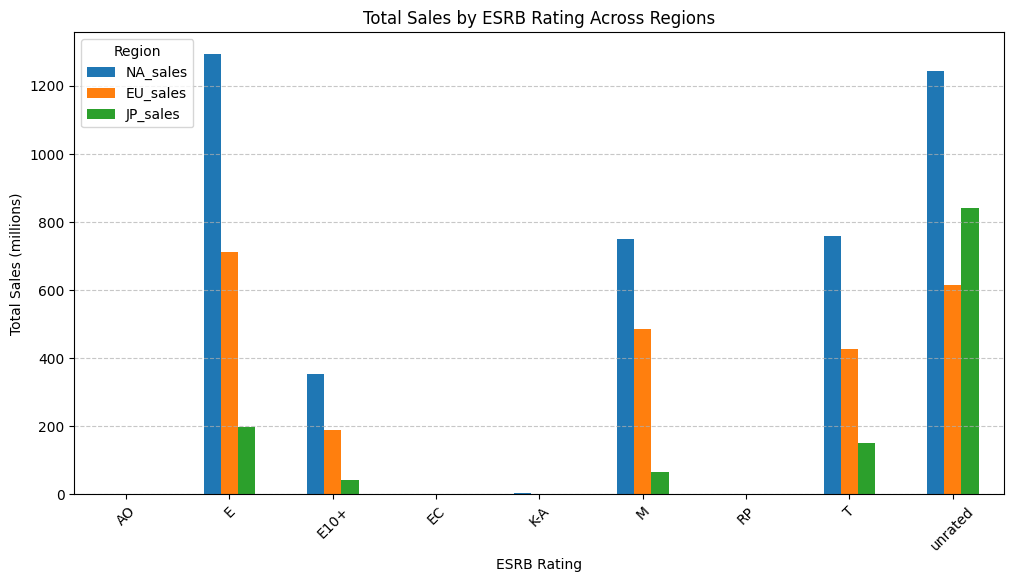

In [17]:
# Aggregate sales by ESRB rating for each region
esrb_sales = df.groupby("Rating")[["NA_sales", "EU_sales", "JP_sales"]].sum()
display("ESRB Rating Sales by Region",esrb_sales)

# Plot ESRB sales distribution per region
plt.figure(figsize=(12, 6))
esrb_sales.plot(kind="bar", figsize=(12, 6))
plt.xlabel("ESRB Rating")
plt.ylabel("Total Sales (millions)")
plt.title("Total Sales by ESRB Rating Across Regions")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

"E" (Everyone) rated games dominate sales in all regions, particularly in North America and Europe.
"E10+" (Everyone 10 and up) games also perform well, but with much lower sales than "E"-rated games.
Japan has significantly lower sales for "E" and "E10+" games compared to North America and Europe.
"AO" (Adults Only) and "EC" (Early Childhood) rated games have very low sales, indicating limited market appeal.
"K-A" (Kids to Adults) has a negligible impact on sales across all regions.
This suggests that family-friendly games (E and E10+) have the highest market appeal globally, while stricter ratings (AO, EC) limit sales potential. Let me know if you want further breakdowns or visualizations! 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~It would be nice if you add some visualizations to this section~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Please add visualization for platforms, genres for each region~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Super We can see that Japan region is very different from others</div>

## Testing hypothesis

In [18]:
alpha=0.05

# Define the relevant time period (last 3-4 years before 2017)
start_year = 2013
end_year = 2016  # Latest available year

# Filter dataset for only the last 3-4 years
recent_data = df[(df["Year_of_Release"] >= start_year) & (df["Year_of_Release"] <= end_year)]

# Drop rows where User_Score is -1 (previously filled missing values)
recent_data = recent_data[recent_data["User_Score"] != -1]

# Filter data for Xbox One and PC platforms within the relevant period
xone_ratings = recent_data[recent_data["Platform"] == "XOne"]["User_Score"]
pc_ratings = recent_data[recent_data["Platform"] == "PC"]["User_Score"]

# Convert User_Score to numeric, handling non-numeric values
xone_ratings = pd.to_numeric(xone_ratings, errors='coerce').dropna()
pc_ratings = pd.to_numeric(pc_ratings, errors='coerce').dropna()

# Perform independent t-test
t_stat_xone_pc, p_value_xone_pc = stats.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

# Hypothesis 2: Average user ratings for Action and Sports genres in relevant period
action_ratings = recent_data[recent_data["Genre"] == "Action"]["User_Score"]
sports_ratings = recent_data[recent_data["Genre"] == "Sports"]["User_Score"]

# Convert User_Score to numeric and drop NaNs
action_ratings = pd.to_numeric(action_ratings, errors='coerce').dropna()
sports_ratings = pd.to_numeric(sports_ratings, errors='coerce').dropna()

# Perform independent t-test
t_stat_action_sports, p_value_action_sports = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Store results in a DataFrame
hypothesis_results = pd.DataFrame({
    "Hypothesis": [
        "Average user ratings of Xbox One and PC platforms are the same (2013-2016)",
        "Average user ratings for Action and Sports genres are different (2013-2016)"
    ],
    "T-Statistic": [t_stat_xone_pc, t_stat_action_sports],
    "P-Value": [p_value_xone_pc, p_value_action_sports],
    "Reject Null (alpha=0.05)": [p_value_xone_pc < alpha, p_value_action_sports < alpha]
})

display("Hypothesis Testing Results (2013-2016)",hypothesis_results)


'Hypothesis Testing Results (2013-2016)'

,Hypothesis,T-Statistic,P-Value,Reject Null (alpha=0.05)
0,Average user ratings of Xbox One and PC platfo...,1.451928,1.475959e-01,False
1,Average user ratings for Action and Sports gen...,10.233428,1.446004e-20,True


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~You need to test hypotheses based on relevant period~~
    
~~Because you filled in user_score with -1 you need to drop such rows~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~We have an issue with the code please fix it~~

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
    
Great - right code and correct result of hypotheses testing

## hypothesis Conclusion 

1.Hypothesis: "Average user ratings of Xbox One and PC platforms are the same (2013-2016)"

T-Statistic: 1.45
P-Value: 0.148
Conclusion: Fail to reject the null hypothesis → No significant difference between Xbox One and PC user ratings during this period.
2.Hypothesis: "Average user ratings for Action and Sports genres are different (2013-2016)"

T-Statistic: 10.23
P-Value: 1.45e-20
Conclusion: Reject the null hypothesis → Action and Sports genres have significantly different average user ratings during this period.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please use Markdown cell to write a text~~